<a href="https://colab.research.google.com/github/Daggubati9/Daggubati9.github.io/blob/main/Day2_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd

# Load Excel file
df = pd.read_excel("titanic3.xls")

# Show first 5 rows
#print(df.head())

# Show basic info about data types and nulls
print(df.info())

# Check for missing values
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB
None
pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
emba

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [5]:
# Describe numerical columns
print(df.describe())

# Describe all columns (including object types)
print(df.describe(include='all'))


            pclass     survived          age        sibsp        parch  \
count  1309.000000  1309.000000  1046.000000  1309.000000  1309.000000   
mean      2.294882     0.381971    29.881135     0.498854     0.385027   
std       0.837836     0.486055    14.413500     1.041658     0.865560   
min       1.000000     0.000000     0.166700     0.000000     0.000000   
25%       2.000000     0.000000    21.000000     0.000000     0.000000   
50%       3.000000     0.000000    28.000000     0.000000     0.000000   
75%       3.000000     1.000000    39.000000     1.000000     0.000000   
max       3.000000     1.000000    80.000000     8.000000     9.000000   

              fare        body  
count  1308.000000  121.000000  
mean     33.295479  160.809917  
std      51.758668   97.696922  
min       0.000000    1.000000  
25%       7.895800   72.000000  
50%      14.454200  155.000000  
75%      31.275000  256.000000  
max     512.329200  328.000000  
             pclass     survived    

In [6]:
# Drop duplicate rows if any
df = df.drop_duplicates()

# Check again for missing values
print(df.isnull().sum())


pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64


In [7]:
# For example: who survived
print(df['survived'].value_counts())

# Gender distribution
print(df['sex'].value_counts())


survived
0    809
1    500
Name: count, dtype: int64
sex
male      843
female    466
Name: count, dtype: int64


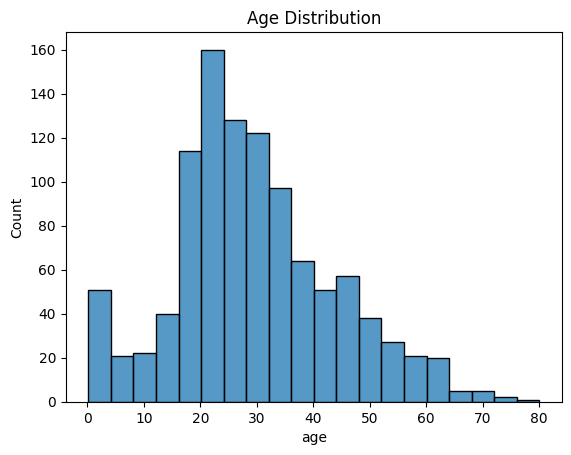

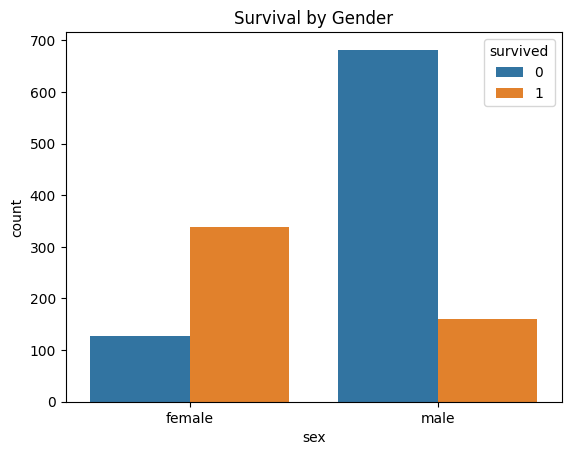

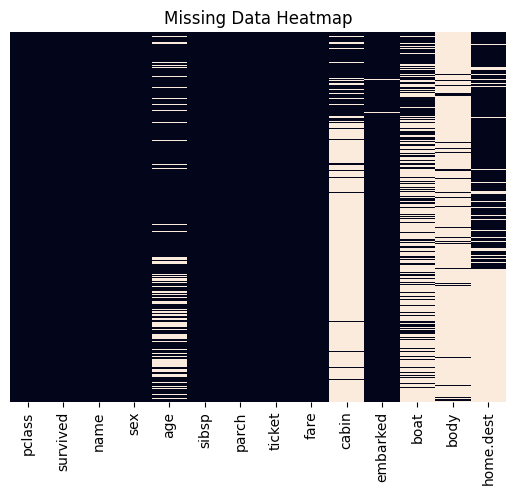

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Histogram of age
sns.histplot(df['age'].dropna(), bins=20)
plt.title("Age Distribution")
plt.show()

# Survival count by gender
sns.countplot(data=df, x='sex', hue='survived')
plt.title("Survival by Gender")
plt.show()

# Heatmap of missing values
sns.heatmap(df.isnull(), cbar=False, yticklabels=False)
plt.title("Missing Data Heatmap")
plt.show()


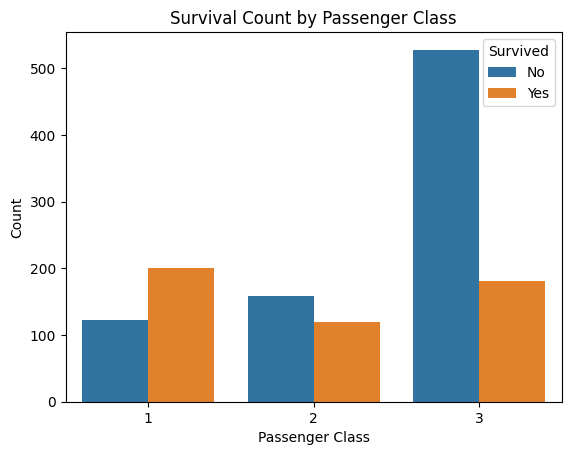

In [11]:
sns.countplot(data=df, x='pclass', hue='survived')
plt.title("Survival Count by Passenger Class")
plt.xlabel("Passenger Class")
plt.ylabel("Count")
plt.legend(title="Survived", labels=["No", "Yes"])
plt.show()


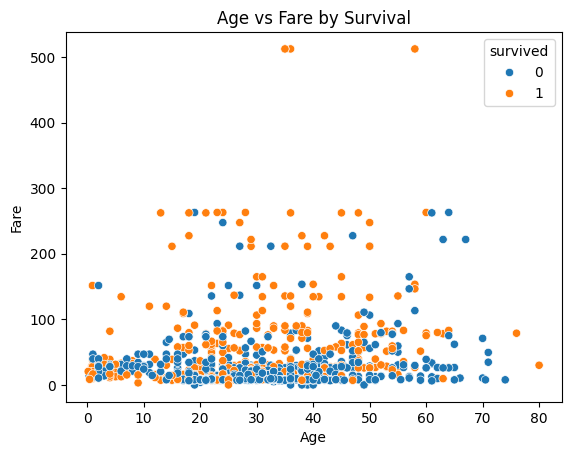

In [12]:
sns.scatterplot(data=df, x='age', y='fare', hue='survived')
plt.title("Age vs Fare by Survival")
plt.xlabel("Age")
plt.ylabel("Fare")
plt.show()


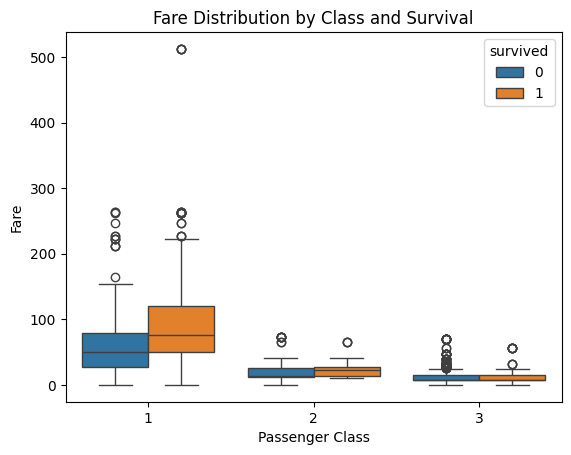

In [13]:
sns.boxplot(data=df, x='pclass', y='fare', hue='survived')
plt.title("Fare Distribution by Class and Survival")
plt.xlabel("Passenger Class")
plt.ylabel("Fare")
plt.show()


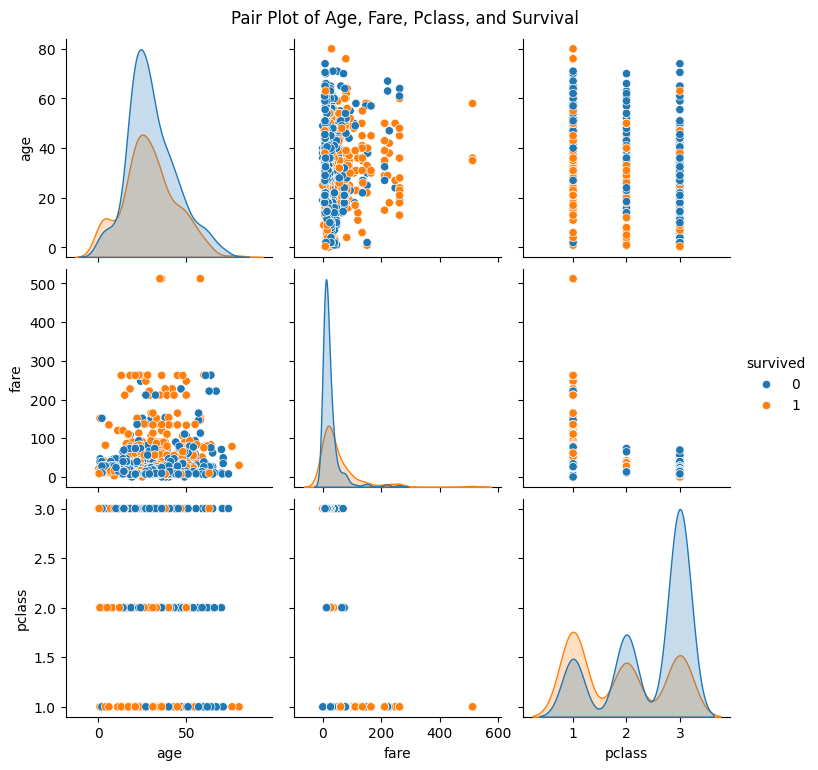

In [14]:
# Selecting a subset with no missing values for cleaner plotting
df_pair = df[['age', 'fare', 'pclass', 'survived']].dropna()

sns.pairplot(df_pair, hue='survived')
plt.suptitle("Pair Plot of Age, Fare, Pclass, and Survival", y=1.02)
plt.show()


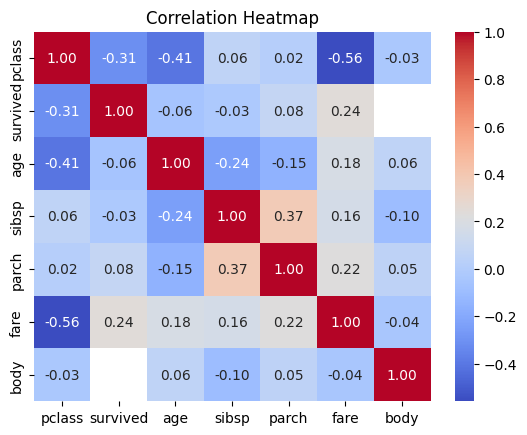

In [15]:
# Compute correlations (only numeric columns)
corr_matrix = df.corr(numeric_only=True)

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()
